In [1]:
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spy=pdr.get_data_yahoo('SPY','2005-01-01','2015-01-01')

In [5]:
spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-01-03,121.760002,119.900002,121.559998,120.300003,55748000.0,86.271614
2005-01-04,120.540001,118.440002,120.459999,118.830002,69167600.0,85.217377
2005-01-05,119.250000,118.000000,118.739998,118.010002,65667300.0,84.629356
2005-01-06,119.150002,118.260002,118.440002,118.610001,47814700.0,85.059631
2005-01-07,119.230003,118.129997,118.970001,118.440002,55847700.0,84.937729


In [11]:
spy['SMA_28']=spy['Close'].rolling(28).mean()

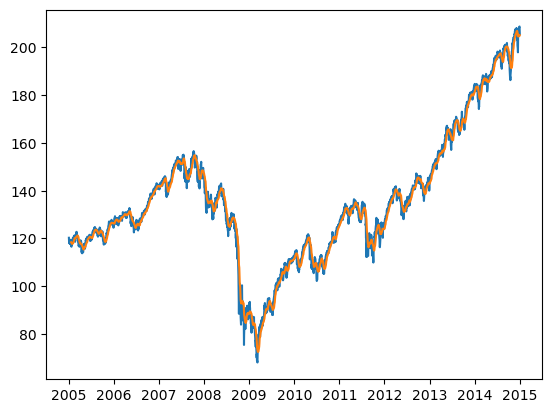

In [10]:
plt.plot(spy['Close'])
plt.plot(spy['SMA_14'])
plt.show()

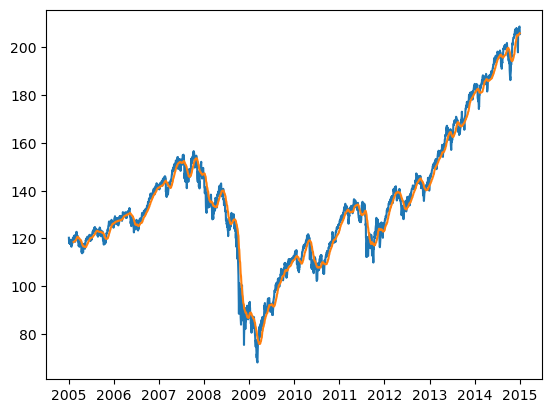

In [12]:
plt.plot(spy['Close'])
plt.plot(spy['SMA_28'])
plt.show()

In [18]:
spy['Close_difference']=spy['Close'].diff()

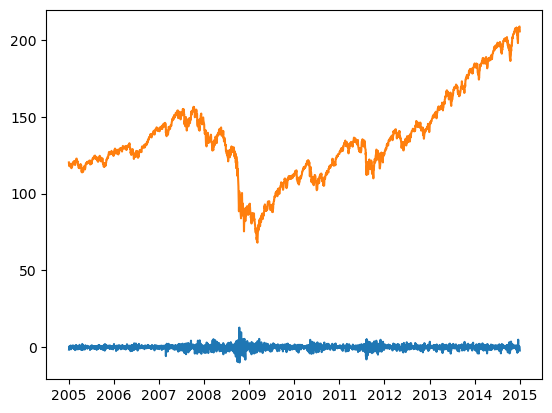

In [19]:
plt.plot(spy['Close_difference'])
plt.plot(spy['Close'])
plt.show()

In [21]:
features=spy[['Close_difference','SMA_14','Close','Volume']]
features=features.dropna()

In [28]:
pip install hmmlearn

In [29]:
from hmmlearn import hmm

In [31]:
model=hmm.GaussianHMM(n_components=3,covariance_type="full", n_iter=1000).fit(features)

In [37]:
hidden_states = model.predict(features)

In [32]:
model.transmat_

array([[0.94796611, 0.02446103, 0.02757286],
       [0.02901986, 0.96885439, 0.00212575],
       [0.04956026, 0.00319378, 0.94724595]])

In [34]:
from matplotlib import cm, pyplot as plt

In [38]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()

Transition matrix
[[0.94796611 0.02446103 0.02757286]
 [0.02901986 0.96885439 0.00212575]
 [0.04956026 0.00319378 0.94724595]]

Means and vars of each hidden state
0th hidden state
mean =  [8.91502322e-02 1.36570422e+02 1.37210852e+02 1.59092098e+08]
var =  [1.42282187e+00 4.71677276e+02 4.35760114e+02 1.83975601e+15]

1th hidden state
mean =  [1.42392246e-01 1.46894685e+02 1.47946077e+02 7.53923423e+07]
var =  [6.07175337e-01 7.87408862e+02 8.26030427e+02 6.38275399e+14]

2th hidden state
mean =  [-2.24337002e-01  1.15155369e+02  1.13399455e+02  3.08585766e+08]
var =  [5.83425039e+00 6.19151943e+02 5.80251948e+02 1.35822031e+16]



NameError: name 'dates' is not defined